<a href="https://colab.research.google.com/github/akibmir90/Machine-Learning-Deep-Learning/blob/main/Global_Terrorrism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Terrorism Exploratory Data Analysis
The purpose of this analysis is to discover what trends in the data there are and what it can tell us about global terrorism attacks in terms of where they occur, the types of terrorist attacks, what weapons were used, who the terrorist targets are, and who the largest terrorist groups are.

The variables of interest in this analysis are:
* Year: Year the attack took place (1970-2017 is the range)
* Country: Country the terrorist attack took place in
* Region: Region the terrorist attack took place in
* City: City the terrorist attack took place in
* Attack Type: How the terrorist attacked the victim
* Weapon Type: Weapon used by terrorist to attack the victim
* Target: Who the target of this terrorist attack is



### Mounting the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Importing the Dataset

In [ ]:
terrorism = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")

### Getting started with the dataset info

In [ ]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
terrorism.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### There are a large number of unnecessary columns and we will only take some important variable related to our objectives

Let us rename them 
Also add a column named Casualities as a combination of Killed and Wounded column.

In [ ]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

terrorism['Casualities'] = terrorism.Killed + terrorism.Wounded

terrorism=terrorism[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

In [ ]:
terrorism.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


### Missing Values

Checking if there are any missing values

In [ ]:
terrorism.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

We can see above there are many missing values in some of the variables

# Visualisation

### Using seaborn, plot a graph showing the counts of different Attack Types

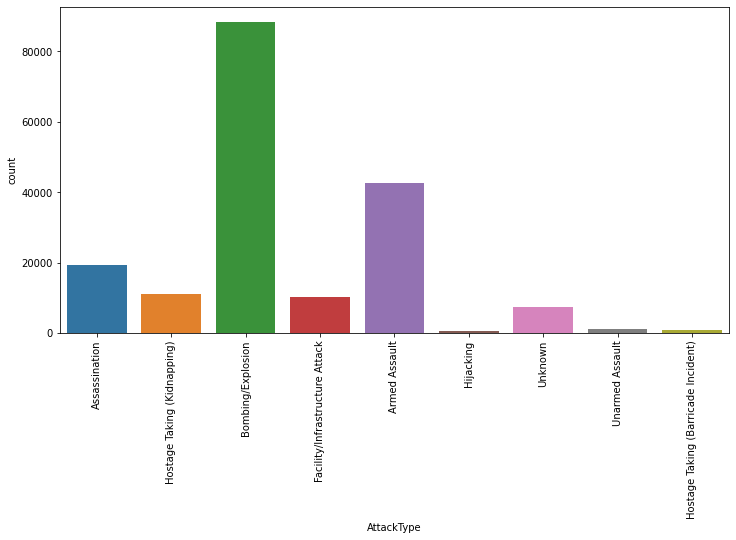

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(terrorism['AttackType'])
plt.xticks(rotation = 90)
plt.show()

The plot above indicating that the most used attack type is Bombing/Explosion and the least used one is Hijacking

#### Plot the Target Type 
Private Citizens and Property is Dominating 

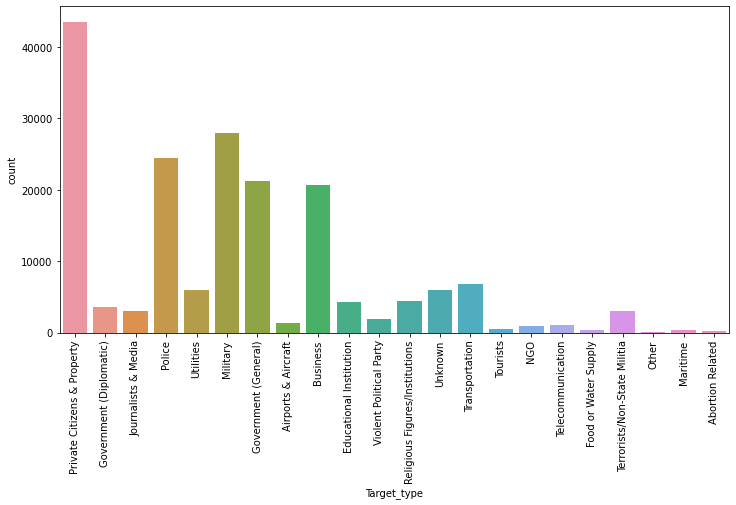

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(terrorism['Target_type'])
plt.xticks(rotation = 90)
plt.show()

As Shown above, Explosions are the most used weapon type

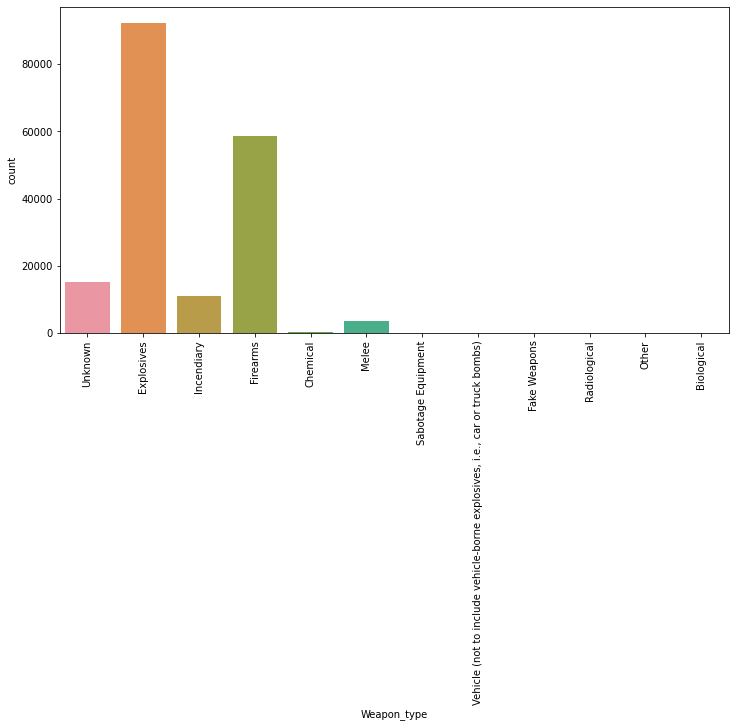

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(terrorism['Weapon_type'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
terrorism['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

### Ploting the number of attacks each year from 1970 to 2017

In [ ]:
x_yr = terrorism['Year'].unique()
x_yr

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
yr_counts = terrorism['Year'].value_counts(dropna = False).sort_index()
yr_counts

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

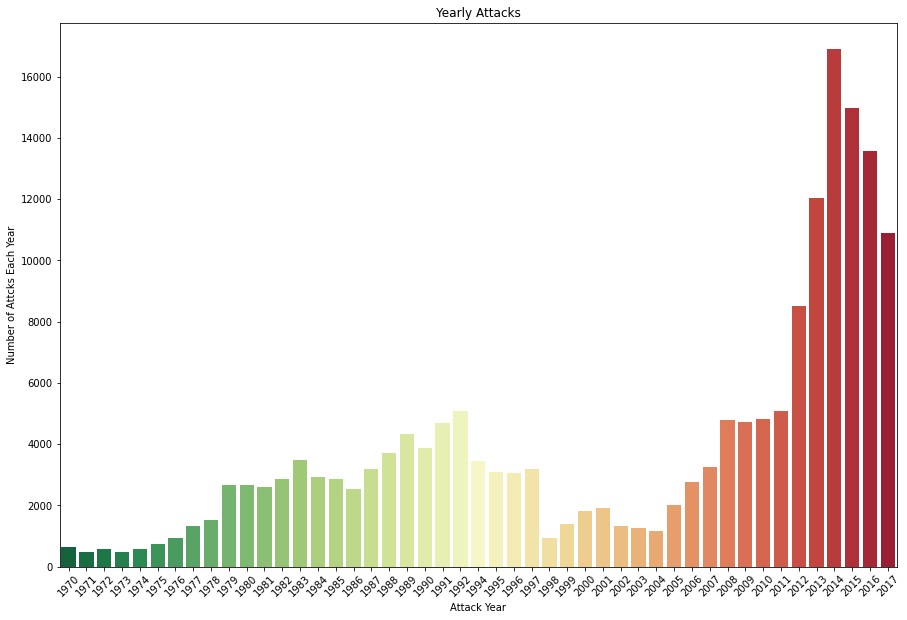

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = x_yr,
           y = yr_counts,
           palette = 'RdYlGn_r')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attcks Each Year')
plt.title('Yearly Attacks')
plt.show()

It can be seen that most of the attacks have been done in year 2014

### Yearly Casualities 

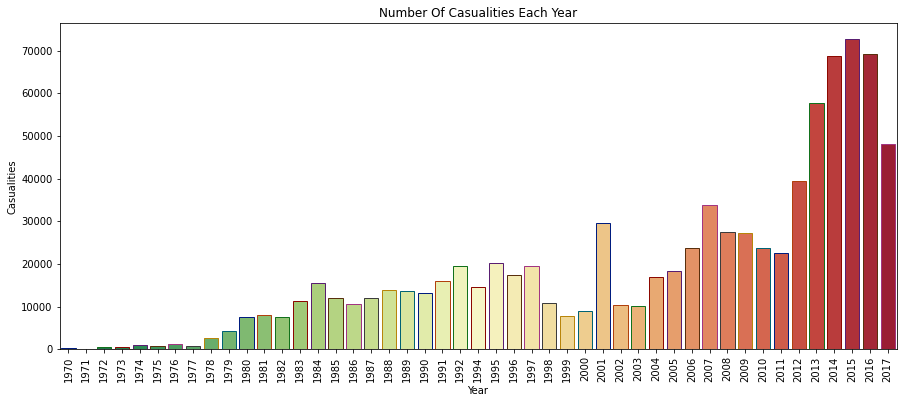

In [ ]:
plt.subplots(figsize=(15,6))
year_cas = terrorism.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

2015 has the most number of killed and wounded individuals

### Number of Yearly Attacks with respect to the Regions  

Text(0, 0.5, 'Number of Attacks')

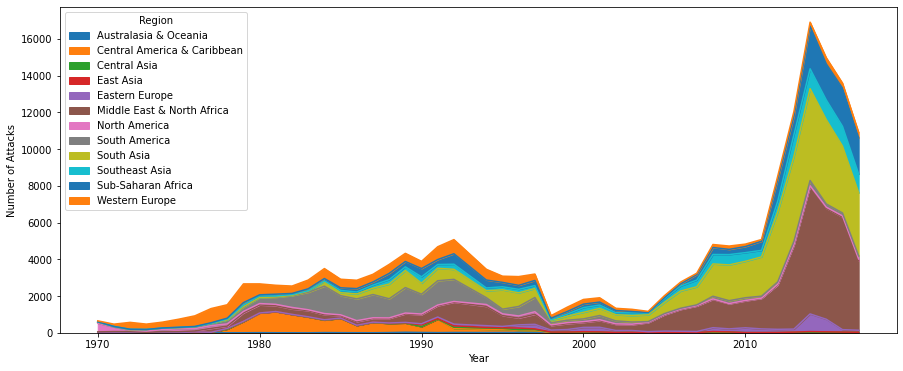

In [ ]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind = 'area',figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

### Top 10 countries affected by the Terrorism

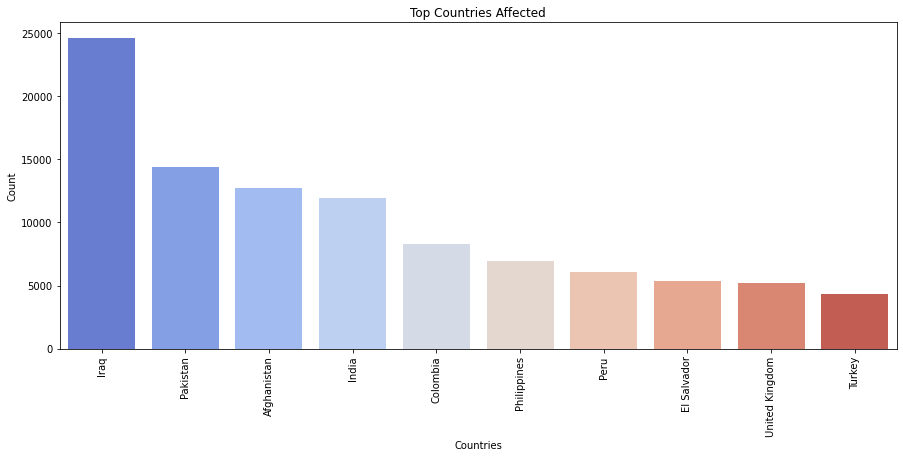

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(terrorism['Country'].value_counts()[:10].index,terrorism['Country'].value_counts()[:10].values,palette='coolwarm')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Regions Attcked the Most

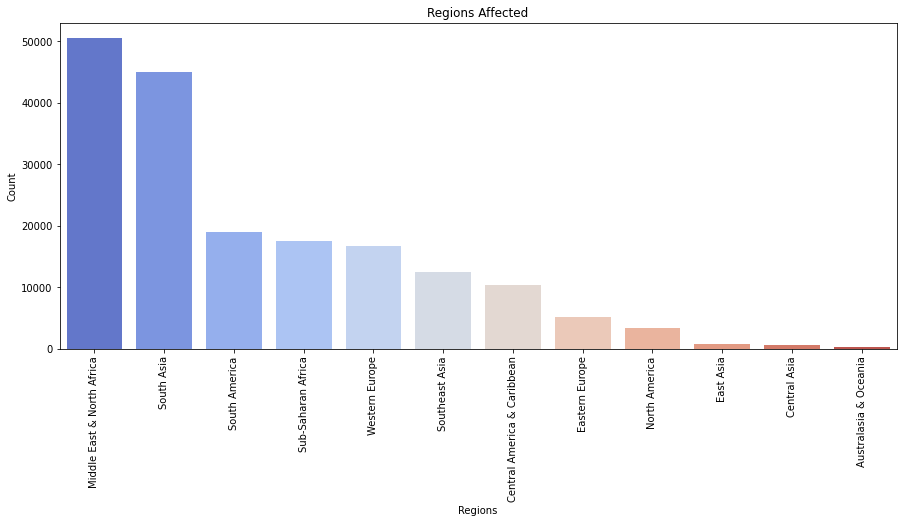

In [ ]:
region_attacks = terrorism.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(region_attacks.Region,region_attacks['Total Attacks'],palette='coolwarm')
plt.title('Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Top 15 cities affcted the most by the attacks 

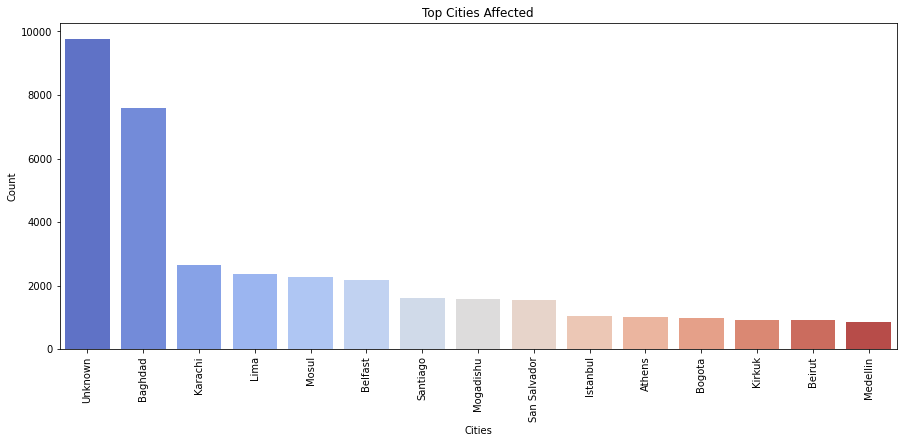

In [ ]:
city_attacks = terrorism.City.value_counts().to_frame().reset_index()
city_attacks.columns = ['City', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(city_attacks.City[:15],city_attacks['Total Attacks'][:15],palette='coolwarm')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Most of the cities affected are unknown. Probably Baghdad is the most affected city as it also is a capital of Iraq which is the most affected country in the world

In [ ]:
terrorism[terrorism['City'] == 'Unknown']

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
16,1970,1,11,Ethiopia,Sub-Saharan Africa,Unknown,NaN,NaN,Unknown,1.0,0.0,1.0,Soldier,Eritrean Liberation Front,Military,Unknown
103,1970,3,3,Spain,Western Europe,Unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Garrigues, permanent spanish delegaet to Unesco",1st of May Group,Government (General),Unknown
132,1970,3,14,Ethiopia,Sub-Saharan Africa,Unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,0.0,Film crew,Eritrean Liberation Front,Journalists & Media,Unknown
165,1970,4,0,Ethiopia,Sub-Saharan Africa,Unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Jack Fry, peace corps official",Eritrean Liberation Front,Government (Diplomatic),Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181544,2017,12,25,Yemen,Middle East & North Africa,Unknown,14.719534,44.247902,Hostage Taking (Kidnapping),NaN,NaN,NaN,Photographers,Houthi extremists (Ansar Allah),Journalists & Media,Unknown
181575,2017,12,27,Afghanistan,South Asia,Unknown,34.317661,70.619396,Hostage Taking (Kidnapping),2.0,0.0,2.0,Agricultural Institute Lecturer: Imam Jan,Taliban,Educational Institution,Unknown
181633,2017,12,29,Israel,Middle East & North Africa,Unknown,31.506981,34.718904,Bombing/Explosion,0.0,0.0,0.0,Unknown,Unknown,Unknown,Explosives
181634,2017,12,29,Israel,Middle East & North Africa,Unknown,31.506981,34.718904,Bombing/Explosion,0.0,0.0,0.0,Unknown,Unknown,Unknown,Explosives


#Conclusion

The year with the most attacks is 1970, which is also the year that Roe vs. Wade lawsuit was filed and the Texas law was declared unconstitutional due to violating the right to privacy. This debate over Roe vs. Wade is likely the major cause of the why there were so many terrorist attacks in 1970.

Bombings/explosives being the most used attack of choice as well as weapon of choice in the US follows the trend of bombings/explosives being the most common attack type for terrorism in other countries also.

The most common target type in the US being businesses is likely due to how company lobbying holds alot of sway in terms of influencing politicians and the politics that are enacted which benefit companies at the expense of citizens.

It is interesting that the anti-abortion extremists are the biggest terrorist group instead of a white nationalist group or a gang because on social media and the news, it's usually always about a gang or white national group publicly causing problems. However, abortion is a very touchy subject in America due to the pro-life side (more heavily religious group) vs. the pro-choice side (tends to be more atheist).